In [1]:

import matplotlib.pyplot as plt
import cv2
import numpy as np
import copy
from skimage import metrics

path=r'D:/Study/Python/openCV/College/res/'

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [21  0  0 ...  0  0  0]]


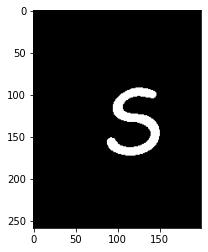

In [2]:
img = cv2.imread(path+'thin.png',0)
plt.imshow(img,'gray')
print(img)

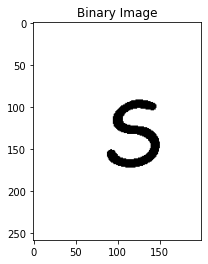

In [3]:
(thresh, blackAndWhiteImage) = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.title('Binary Image')
plt.imshow(blackAndWhiteImage,'gray')
for i in range(img.shape[0]):
    for j in range (img.shape[1]):
        blackAndWhiteImage[i,j]=255-blackAndWhiteImage[i,j]

plt.imshow(blackAndWhiteImage,'gray')

In [4]:
struc_ele1=np.array([[255,255,255],[999,0,999],[0,0,0]])
struc_ele2=np.array([[999,255,255],[0,0,255],[0,0,999]])
struc_ele3=np.array([[0,0,0],[999,0,999],[255,255,255]])
struc_ele4=np.array([[0,0,999],[0,0,255],[999,255,255]])
struc_ele5=np.array([[0,0,0],[999,0,999],[255,255,255]])
struc_ele6=np.array([[999,0,0],[255,0,0],[255,255,999]])
struc_ele7=np.array([[255,999,0],[255,0,0],[255,999,0]])
struc_ele8=np.array([[255,255,999],[255,0,0],[999,0,0]])

ele=[struc_ele1,struc_ele2,struc_ele3,struc_ele4,struc_ele5,struc_ele6,struc_ele7,struc_ele8]

In [5]:
padded_arr =np.zeros((img.shape[0]+2,img.shape[1]+2))
img1=np.zeros(img.shape,'uint8')
result=[]

for e in range(len(ele)):
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            padded_arr[i+1][j+1] = blackAndWhiteImage[i][j]

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            index1=0
            c=True
            for k in range(i,i+3):
                index2=0
                for l in range(j,j+3):
                    if(padded_arr[k][l]!=ele[e][index1][index2] and ele[e][index1][index2] != -1):
                        c=False
                        break
                    index2+=1
                if(not(c)):
                    break
                index1+=1
            if(c):
                img1[i][j]=255
            else:
                img1[i][j]=blackAndWhiteImage[i][j]

    temp=copy.deepcopy(img1)
    result.append(temp)

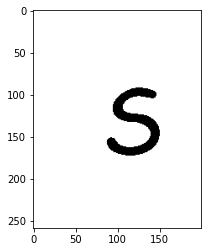

In [6]:
plt.imshow(result[3],'gray')

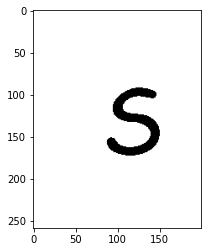

In [7]:
plt.imshow(img1,'gray')

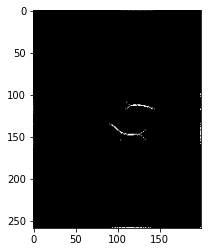

In [8]:
# Create an image with text on it
img = cv2.imread(path+'thin.png',0)
 
# Structuring Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Create an empty output image to hold values
thin = np.zeros(img.shape,dtype='uint8')
 
# Loop until erosion leads to an empty set
while (cv2.countNonZero(img1)!=0):
    # Erosion
    erode = cv2.erode(img1,kernel)
    # Opening on eroded image
    opening = cv2.morphologyEx(erode,cv2.MORPH_OPEN,kernel)
    # Subtract these two
    subset = erode - opening
    # Union of all previous sets
    thin = cv2.bitwise_or(subset,thin)
    # Set the eroded image for next iteration
    img1 = erode.copy()
    
plt.imshow(img,'gray')
plt.imshow(thin,'gray')